In [102]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
%matplotlib inline

def option_price(volatility, number_of_asset_steps):
    interest_rate = 0.05
    expiration = 1
    option_type = 'c'
    strike_price = 100
    option_exercise_type = 'e'

    s = [0 for i in range(number_of_asset_steps+1)]
    ds = float(2 * strike_price)/ number_of_asset_steps
    dt = float(0.9) /float(volatility**2 * number_of_steps **2 )
    number_time_steps = (int(expiration / dt) + 1)
    dt = float(expiration)/(number_time_steps)

    q = 1

    options_price_array = [[0 for x in range(number_time_steps+1)] for y in range(number_of_asset_steps+1)]

    if option_type == 'p':
        q = -1

    for i in range(number_of_asset_steps+1):
        s[i] = i * ds
        options_price_array[i][0] = max(q * (s[i] - strike_price), 0)

    for time_step in range(number_time_steps+1):
        if time_step == 0:
            continue
        for asset_step in range(number_of_asset_steps):
            if asset_step == 0:
                continue
            delta = float(options_price_array[asset_step+1][time_step-1] - options_price_array[asset_step-1][time_step-1])/(2 * ds)
            gamma = float(options_price_array[asset_step+1][time_step-1] - 2 * options_price_array[asset_step][time_step-1] + options_price_array[asset_step-1][time_step-1])/(ds*ds)
            theta = float(-0.5 * volatility **2 * s[i] ** 2 * gamma) - float(interest_rate * s[i] * delta) +  float(interest_rate * options_price_array[asset_step][time_step-1])
            options_price_array[asset_step][time_step] = options_price_array[asset_step][time_step-1] - theta * dt

        options_price_array[0][time_step] = float(1 - interest_rate*dt)*options_price_array[0][time_step-1]
        options_price_array[number_of_asset_steps][time_step] = 2 * options_price_array[number_of_asset_steps-1][time_step] - options_price_array[number_of_asset_steps-2][time_step]

    plt.plot(options_price_array)
    plt.show()

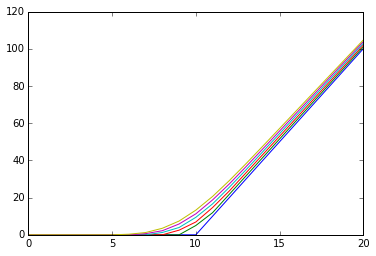

In [98]:
option_price(.10, 20)

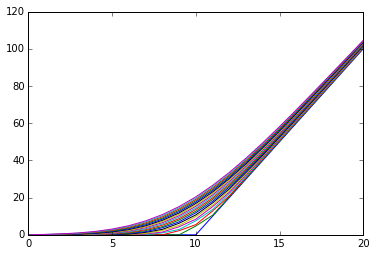

In [99]:
option_price(.20,20)

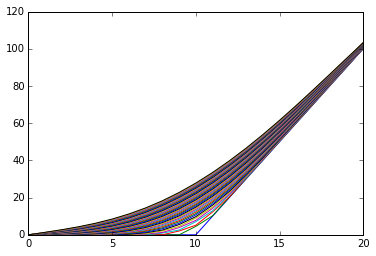

In [100]:
option_price(.30,20)

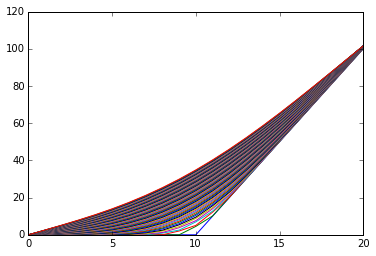

In [103]:
option_price(.40,20)